In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ИЗУЧЕНИЕ ДАННЫХ

train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

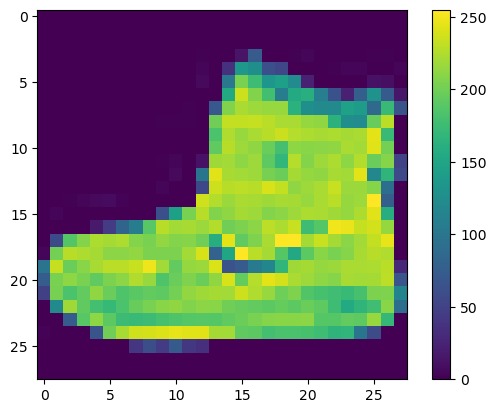

In [9]:
# ПОДГОТОВКА ДАННЫХ

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

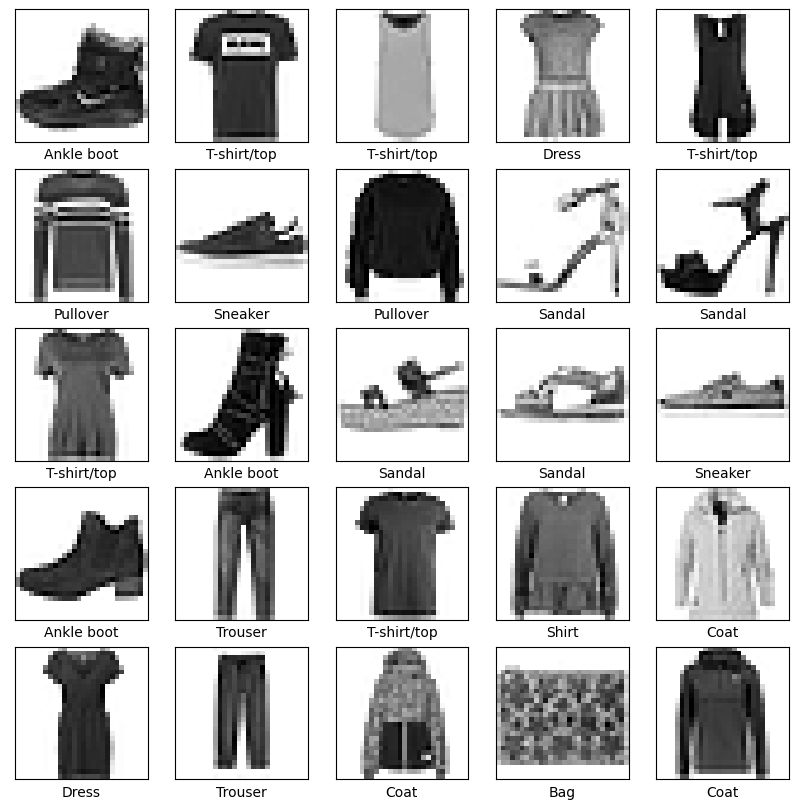

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [11]:
# ПОСТРОЕНИЕ МОДЕЛИ

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
    ])


# КОМПИЛЯЦИЯ МОДЕЛИ
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
# ВЫДЕЛЕНИЕ ПРОВЕРОЧНОГО НАБОРА
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# ОБУЧЕНИЕ МОДЕЛИ
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


2023-06-02 10:16:42.980162: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


Epoch 1/20
97/98 [============================>.] - ETA: 0s - loss: 0.7178 - accuracy: 0.7543

2023-06-02 10:16:48.510467: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


98/98 [==============================] - 4s 16ms/step - loss: 0.7158 - accuracy: 0.7551 - val_loss: 0.5015 - val_accuracy: 0.8272
Epoch 2/20
98/98 [==============================] - 1s 12ms/step - loss: 0.4627 - accuracy: 0.8386 - val_loss: 0.4412 - val_accuracy: 0.8449
Epoch 3/20
98/98 [==============================] - 1s 11ms/step - loss: 0.4179 - accuracy: 0.8526 - val_loss: 0.4110 - val_accuracy: 0.8562
Epoch 4/20
98/98 [==============================] - 1s 11ms/step - loss: 0.3928 - accuracy: 0.8600 - val_loss: 0.3933 - val_accuracy: 0.8630
Epoch 5/20
98/98 [==============================] - 1s 12ms/step - loss: 0.3708 - accuracy: 0.8683 - val_loss: 0.3820 - val_accuracy: 0.8640
Epoch 6/20
98/98 [==============================] - 1s 11ms/step - loss: 0.3562 - accuracy: 0.8729 - val_loss: 0.3736 - val_accuracy: 0.8688
Epoch 7/20
98/98 [==============================] - 1s 12ms/step - loss: 0.3448 - accuracy: 0.8759 - val_loss: 0.3634 - val_accuracy: 0.8703
Epoch 8/20
98/98 [======

In [12]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

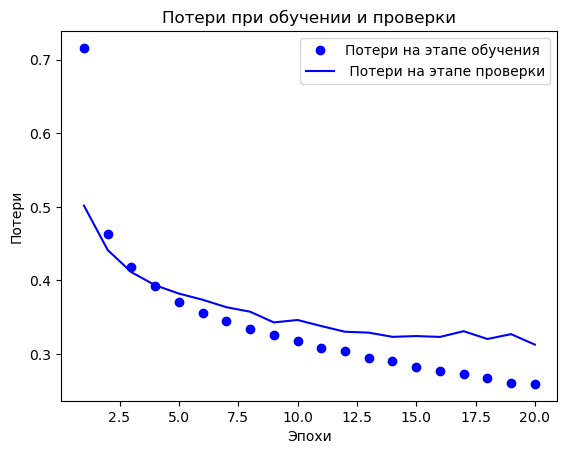

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Потери на этапе обучения')
plt.plot(epochs, val_loss, 'b', label=' Потери на этапе проверки')
plt.title('Потери при обучении и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()


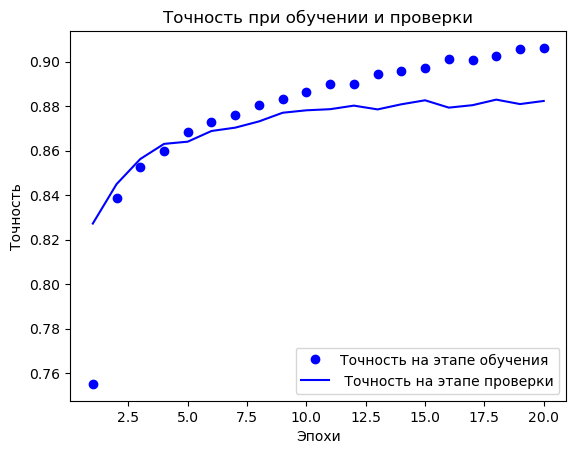

In [14]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Точность на этапе обучения')
plt.plot(epochs, val_acc, 'b', label=' Точность на этапе проверки')
plt.title('Точность при обучении и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()


In [15]:
#  ОЦЕНКА ТОЧНОСТИ МОДЕЛИ 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nТочность на проверочных данных:', test_acc)

 42/313 [===>..........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8795

2023-06-02 10:17:09.912739: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8718

Точность на проверочных данных: 0.8718000054359436


In [16]:
# ИСПОЛЬЗОВАНИЕ МОДЕЛИ ДЛЯ ПРЕДСКАЗАНИЙ

predictions = model.predict(test_images)
predictions[0]

  1/313 [..............................] - ETA: 36s

2023-06-02 10:17:10.818622: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


array([2.7574899e-07, 2.8690232e-07, 2.5405247e-05, 2.3256074e-05,
       8.0430036e-06, 2.0433178e-02, 1.2013581e-04, 2.0081123e-02,
       2.3343657e-04, 9.5907491e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])


9

In [18]:
test_labels[0]

9

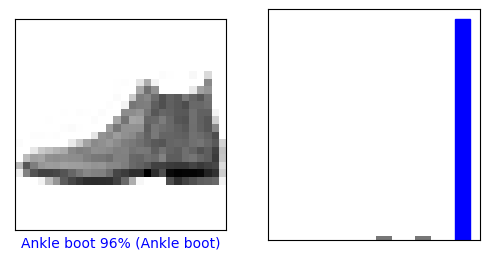

In [19]:
# График изображений 
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

# Диаграмма вероятностей классов
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()



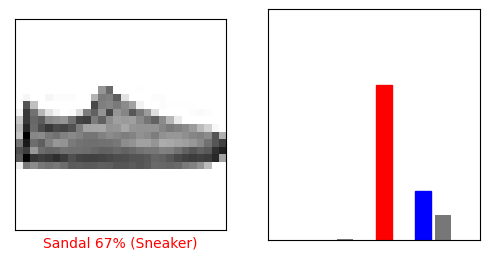

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,test_labels)
plt.show()


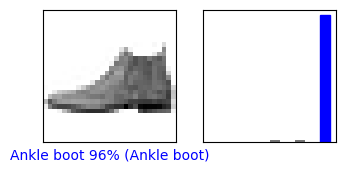

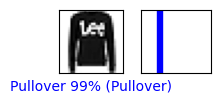

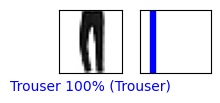

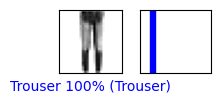

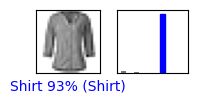

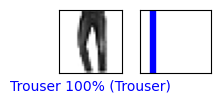

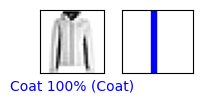

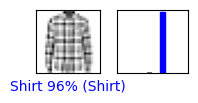

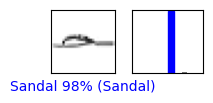

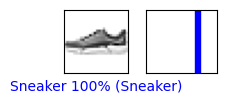

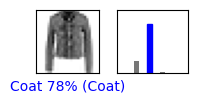

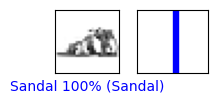

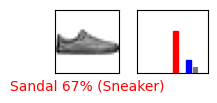

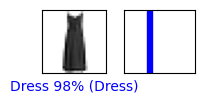

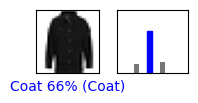

In [21]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    plt.show()


In [22]:
# Берем одну картинку из проверочного сета.
img = test_images[0]
print(img.shape)


(28, 28)


In [23]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 33ms/step
[[2.7574899e-07 2.8690206e-07 2.5405223e-05 2.3256029e-05 8.0429954e-06
  2.0433148e-02 1.2013581e-04 2.0081123e-02 2.3343634e-04 9.5907491e-01]]


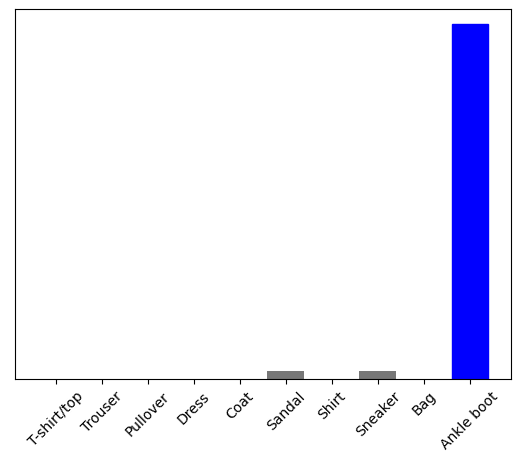

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [26]:
np.argmax(predictions_single[0])


9

In [27]:
model.save('model_tanh_class.h5')

baza_model = keras.models.load_model('model_baza_class.h5')
loss, acc = baza_model.evaluate(test_images, test_labels)
print("Базовая модель, точность: {:5.2f}%".format(100*acc))
print("Базовая модель, потери: {:5.2f}%".format(100*loss))

Dense3_model =  keras.models.load_model('model_Dop1_3dense_class.h5')
test_loss, test_acc = Dense3_model.evaluate(test_images, test_labels)
print("Модель с 3 скрытыми слоями, точность: {:5.2f}%".format(100*test_acc))
print("Модель с 3 скрытыми слоями, потери: {:5.2f}%".format(100*test_loss))

LessNeyron64_model =  keras.models.load_model('model_Dop2_64neyrona_class.h5')
test_loss, test_acc = LessNeyron64_model.evaluate(test_images, test_labels)
print("Модель с 64 нейронами, точность: {:5.2f}%".format(100*test_acc))
print("Модель с 64 нейронами, потери: {:5.2f}%".format(100*test_loss))

Mean_squared_error_model =  keras.models.load_model('model_mean_squared_error_class.h5')
test_loss, test_acc = Mean_squared_error_model.evaluate(test_images, test_labels)
print("Модель с функцией потерь mean_squared_error, точность: {:5.2f}%".format(100*test_acc))
print("Модель с функцией потерь mean_squared_error, потери: {:5.2f}%".format(100*test_loss))

Tanh_model =  keras.models.load_model('model_tanh_class.h5')
test_loss, test_acc = Tanh_model.evaluate(test_images, test_labels)
print("Модель с функцией потерь mean_squared_error, точность: {:5.2f}%".format(100*test_acc))
print("Модель с функцией потерь mean_squared_error, потери: {:5.2f}%".format(100*test_loss))

2023-06-02 10:17:17.920517: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.3401 - accuracy: 0.8777
Базовая модель, точность: 87.77%
Базовая модель, потери: 34.01%
313/313 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8836
Модель с 3 скрытыми слоями, точность: 88.36%
Модель с 3 скрытыми слоями, потери: 33.57%
313/313 [==============================] - 1s 3ms/step - loss: 0.3705 - accuracy: 0.8696
Модель с 64 нейронами, точность: 86.96%
Модель с 64 нейронами, потери: 37.05%
313/313 [==============================] - 1s 3ms/step - loss: 27.6100 - accuracy: 0.1047
Модель с функцией потерь mean_squared_error, точность: 10.47%
Модель с функцией потерь mean_squared_error, потери: 2761.00%
313/313 [==============================] - 1s 3ms/step - loss: 0.3451 - accuracy: 0.8718
Модель с функцией потерь mean_squared_error, точность: 87.18%
Модель с функцией потерь mean_squared_error, потери: 34.51%
